# Lab Notebook 2 - Classical Inference vs Machine Learning

## Step 1

We will use the same data from Lab 1 on Monday, but we will now approach this problem from a machine learning (ML) perspective. The modules, random seed, and data are set up as before:

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
np.random.seed(11) 
x = np.arange(-10,10+2,2) 
y = 2*x**2 - 3*x - 1 + np.random.randn(len(x))*10 

Set your graph parameters (with matplotlib.rc) and plot the data as before.

In [4]:
matplotlib.rc('font', size=12)
matplotlib.rc('axes', titlesize=16)
matplotlib.rc('axes', labelsize=14)
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)
matplotlib.rc('legend', fontsize=12)
matplotlib.rc('figure', titlesize=18)
plt.rc('figure',figsize=(8,6))

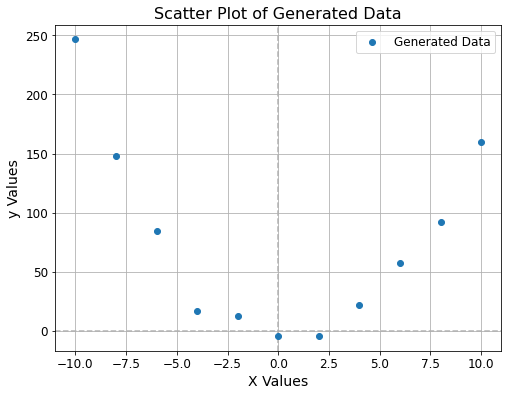

In [498]:
#Scatter plot
plt.scatter(x,y,label='Generated Data',zorder=2)

#Title and labels
plt.title('Scatter Plot of Generated Data')
plt.xlabel('X Values')
plt.ylabel('y Values')

#Horizontal and vertical dashed lines
plt.axhline(0,color='gray',linestyle='--',alpha=0.6,zorder=1)
plt.axvline(0,color='gray',linestyle='--',alpha=0.6,zorder=1)

#Show the plot and legend
plt.legend()
plt.grid(True)
plt.show()

## Step 2

From sklearn, import DecisionTreeRegressor, LinearRegression, and train_test_split.  Using train_test_split, divide the learning set (the data we've generated above) into training and test subsets. Make sure to set test_size=3 and fix the random_state of train_test_split to 9 for reproducibility.

In [499]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [500]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=3,random_state=9)

## Step 3

Now, let "treemodel" be the Decision Tree Regression model (use DecisionTreeRegressor with default parameters, but fix random_state to 8 for reproducibility):

In [501]:
treemodel=DecisionTreeRegressor(random_state=8)

Now, fit the treemodel using the training set. To do this, use treemodel.fit with inputs X_train and y_train. You will need to reshape one of these inputs.

In [502]:
#Reshape
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)

treemodel.fit(X_train,y_train)

DecisionTreeRegressor(random_state=8)

Now, use "predict" on X_test to find the predicted y-values using the Decision Tree:

In [503]:
y_pred=treemodel.predict(X_test)

How do the predictions compare to the actual y test values we have? To find out, print the y predictions and y_test. Plot them vs the data points (include a legend).

Predicted y-values: [ -4.36629362  16.46681441 148.13927003]
Actual y_test values: [ 22.15402668  12.91715371 246.49454741]


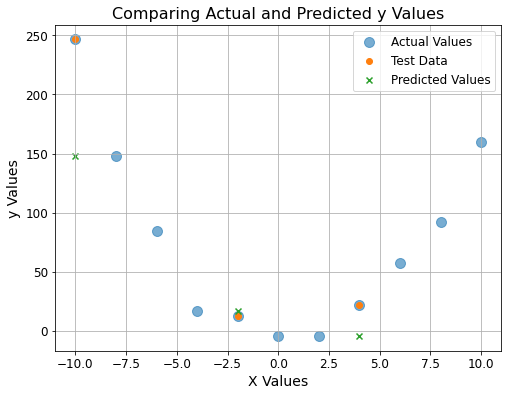

In [504]:
print("Predicted y-values:",y_pred)
print("Actual y_test values:",y_test)

plt.scatter(x,y,label='Actual Values',s=100,alpha=0.6)
plt.scatter(X_test,y_test,label='Test Data')
plt.scatter(X_test,y_pred,marker='x',label='Predicted Values')

plt.title('Comparing Actual and Predicted y Values')
plt.xlabel('X Values')
plt.ylabel('y Values')
plt.legend()

plt.grid(True)
plt.show()

## Step 4

Now, calculate the mean squared error for the predicted y values. The squared error is the square of the difference between predicted and observed values:

In [507]:
def mean_errors_squared(y_obs,y_pred):
    #Squared differences between observed and predicted y values
    error_sqd=(y_obs-y_pred)**2
    
    #Mean
    mean_error_sqd=np.sum(error_sqd)/len(y_obs)
    
    return mean_error_sqd

In [510]:
mse1=mean_errors_squared(y_test,y_pred)
print('Mean Squared Error:',mse1)

Mean Squared Error: 3463.229356331205


In a similar manner, compute the mean squared error on the train data. Is it different from the test error? Does the result surprise you?

In [511]:
y_pred_1=treemodel.predict(X_train)

mse2=mean_errors_squared(y_train, y_pred_1)
print('Mean Squared Error on Training Data:',mse2)

Mean Squared Error on Training Data: 0.0


#### It makes sense that the training set error is smaller than the test set error because the model is trained on the training set

Predict the y-value at x=12:

In [512]:
val=treemodel.predict([[12]])
print('Predicted y-value at x=12:',val[0])

Predicted y-value at x=12: 160.13760330044528


## Step 5

Now we're going to use a linear regression model on our data. 

From sklearn.preprocessing, import PolynomialFeatures. Define "poly" as the ouput of PolynomialFeatures(degree=2, include_bias=False).

In [513]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2,include_bias=False)

Next, perform a fit_transform on poly with the x-array as the input. You will need to reshape x. Save the output as "poly_features" and inspect the feature matrix via print(). Are you satisfied with the result?

In [514]:
x=x.reshape(-1,1)
poly_features=poly.fit_transform(x)

print('Polynomial Features Matrix:',poly_features)

Polynomial Features Matrix: [[-10. 100.]
 [ -8.  64.]
 [ -6.  36.]
 [ -4.  16.]
 [ -2.   4.]
 [  0.   0.]
 [  2.   4.]
 [  4.  16.]
 [  6.  36.]
 [  8.  64.]
 [ 10. 100.]]


#### We are satisfied with the result since the second column is equal to the square of the first

Now, we'll define the training and test sets! Use train_test_split on poly_features and y with test_size=3 and random_state=9 to find X_train, X_test, y_train, y_test.

In [515]:
X_train,X_test,y_train,y_test=train_test_split(poly_features,y,test_size=3,random_state=9)

Create a linear regression model "poly_reg_model". Fit it on the training set X_train and y_train. Use poly_reg_model to predict the y-values for X_test.

In [516]:
poly_reg_model=LinearRegression().fit(X_train,y_train)
y_pred=poly_reg_model.predict(X_test)

print("Predicted y values:",y_pred)

Predicted y values: [ 12.32360877   5.23013119 219.62046954]


For comparison, print the x-test, y-test, and y-predicted values. Furthermore, plot the predicted y-values alongside our generated data. Include a legend.

X test: [  4.  -2. -10.]
y test: [ 22.15402668  12.91715371 246.49454741]
Predicted y values: [ 12.32360877   5.23013119 219.62046954]


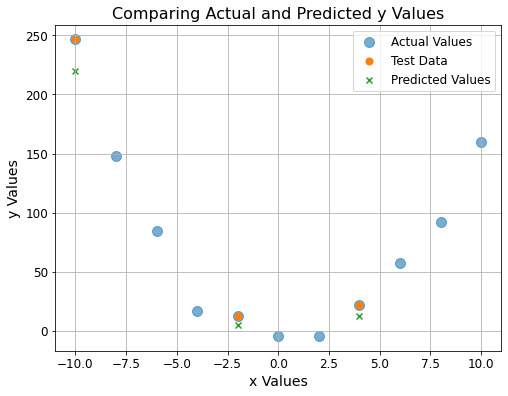

In [519]:
print("X test:",X_test[:,0])
print("y test:",y_test)
print("Predicted y values:",y_pred)

plt.scatter(x,y,label='Actual Values',s=100,alpha=0.6)
plt.scatter(X_test[:,0],y_test,label='Test Data',s=50)
plt.scatter(X_test[:,0],y_pred,label='Predicted Values',marker='x')

plt.title('Comparing Actual and Predicted y Values')
plt.xlabel('x Values')
plt.ylabel('y Values')

plt.grid(True)
plt.legend()
plt.show()

## Step 6

As before for the decision tree model, calculate the mean squared error for the predicted y values, i.e. the test error:


In [521]:
mse3=mean_errors_squared(y_test,y_pred)
print('Mean Squared Error:',mse3)

Mean Squared Error: 292.64783101675016


Again please also check the train error for the linear model and comment on its behavior in comparison to the decision tree.

In [522]:
y_pred=poly_reg_model.predict(X_train)

mse4=mean_errors_squared(y_train,y_pred)
print('Mean Squared Error on Training Data:',mse4)

Mean Squared Error on Training Data: 69.00444940225547


#### Since the training error is smaller than the test error, this could suggest potential overfitting. However, the train error is larger and closer to the test error than for the decision tree. Again indicating a better model.

Predict the y-value at x=12:

In [523]:
val=poly_reg_model.predict(poly.fit_transform(np.array([[12]])))
print('Predicted y-value at x=12:',val[0])

Predicted y-value at x=12: 245.62988730977418


Based on the results so far, which ML method is better? Why? 

#### The polynomial regression model is better as its test error is significantly lower and its train error is closer to its test error. 

## Step 7

An obvious question that arises is how we could improve the performance of the ML model. For the linear model, we had to create both linear and quadratic features for it to be successful. Could you improve the decision tree model by also giving it both linear and quadratic features, that is a feature matrix that contains both x and x^2?

To answer this question, create such an extended feature matrix using the exact same test/train data set from step 2, and re-fit the decision tree regressor with that new matrix. Now check the test error again, any improvement? If not, why not?

In [525]:
np.random.seed(11) 
x = np.arange(-10,10+2,2) 
y = 2*x**2 - 3*x - 1 + np.random.randn(len(x))*10 

x=x.reshape(-1,1)
poly_features=poly.fit_transform(x)
X_train,X_test,y_train,y_test=train_test_split(poly_features,y,test_size=3,random_state=9)

treemodel_extended = DecisionTreeRegressor(random_state=8)
treemodel_extended.fit(X_train, y_train)

y_pred_tree_extended = treemodel_extended.predict(X_test)

mse4=mean_errors_squared(y_test,y_pred_tree_extended)

print("Mean Squared Error on Test Data:",mse4)

Mean Squared Error on Test Data: 3332.9919122496963


#### There is an improvement when compared to step 4, however it is clear that the improvements made in step 6 are mainly due to the LinearRegression() function, as the imrovement is minimal when adding quadratic features for the decision tree model.

## Step 8

Another possiblity for increasing the performance of the ML models would be to increase the size of the learning set. Let's increase the number of data points by a factor of 10 by spacing the x-values 0.2 apart instead of 2, and generate the corresponding y-values, as in step 1. Find the new test error for both ML models on this enlarged data set, and comment on the result.

Careful: when you split_test_train, make sure to increase the size of the test set accordingly

If you have time and are curious, try to increase the size of the learning set even more, say by one or two orders of magnitude? Do the test errors keep changing or not?

In [638]:
np.random.seed(11) 
x = np.arange(-10,10+2,0.2) 
y = 2*x**2 - 3*x - 1 + np.random.randn(len(x))*10 
x=x.reshape(-1,1)

In [639]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=3,random_state=9)
treemodel=DecisionTreeRegressor(random_state=8)
y_pred=treemodel.fit(X_train,y_train).predict(X_test)
mse5=mean_errors_squared(y_test,y_pred)
print('Mean Squared Error:',mse5)

Mean Squared Error: 4.345474809682372


In [640]:
poly=PolynomialFeatures(degree=2,include_bias=False)
poly_features=poly.fit_transform(x)
X_train,X_test,y_train,y_test=train_test_split(poly_features,y,test_size=3,random_state=9)
poly_reg_model=LinearRegression().fit(X_train,y_train)
y_pred=poly_reg_model.predict(X_test)
mse6=mean_errors_squared(y_test,y_pred)
print('Mean Squared Error:',mse6)

Mean Squared Error: 50.55416909608498


In [647]:
np.random.seed(11) 
ar=np.arange(10,0,-0.1)
mse_t=[]
mse_p=[]
for el in ar:
    x = np.arange(-10,10+2,el) 
    y = 2*x**2 - 3*x - 1 + np.random.randn(len(x))*10 
    x=x.reshape(-1,1)
    X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=9)
    y_pred=treemodel.fit(X_train,y_train).predict(X_test)
    
    mse_t.append(mean_errors_squared(y_test,y_pred))
    
    poly=PolynomialFeatures(degree=2,include_bias=False)
    poly_features=poly.fit_transform(x)
    X_train,X_test,y_train,y_test=train_test_split(poly_features,y,test_size=0.3,random_state=9)
    poly_reg_model=LinearRegression().fit(X_train,y_train)
    y_pred=poly_reg_model.predict(X_test)
    
    mse_p.append(mean_errors_squared(y_test,y_pred))

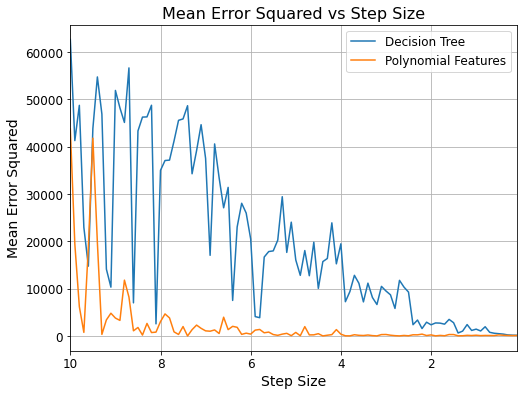

In [651]:
plt.plot(ar,mse_t,label='Decision Tree')
plt.plot(ar,mse_p,label='Polynomial Features')

plt.title('Mean Error Squared vs Step Size')
plt.xlabel('Step Size')
plt.ylabel('Mean Error Squared')

plt.xlim(max(ar), min(ar))
plt.grid(True)
plt.legend()
plt.show()

#### As you can see as you decrease the step size or enlarge the data set, the mean error squared decreases using both methods. The decrease isn't linear however it converges to near 0 much quicker for the polynomial features model. The decision tree model does eventually converge as the size of the data set increases however it changes erratically up and down with a general trend of decreasing down to a step size of 2, after this it converges relatively smoothly. Clearly the polynomial features model is bettter as it converges much quicker. 